# Orizon: Frequência de Exames Adicionais

In [284]:
import pandas as pd
import seaborn as sb
import numpy as np

Configurando sessão:

In [264]:
df = pd.read_csv("./full_extracts/data_30726034.csv", encoding = "ISO-8859-1")

Carregando dados do TUSS relativo à displasia coxo-femural (código 30724058)

In [265]:
selected_df = pd.concat([df["'id_conta'"], df["'servico'"], df["'descricao_despesa'"], df["'tipo_item'"]], axis=1)

Verificando se os tipos foram inferidos corretamente:

In [266]:
selected_df.columns = ["id_conta", "servico", "descricao", "tipo_item"]

Utilizaremos apenas os campos "id_conta", "servico", "descricao_despesa" e "tipo_item". Vamos também tirar as aspas dos nomes das labels para facilitar a análise:

In [267]:
count_df = selected_df.groupby("id_conta").count()

Vamos trabalhar apenas com os id_conta atrelados à mais de um serviço:

In [268]:
def get_count(acc_id):
    return count_df.lookup([acc_id], ["servico"])[0]

In [269]:
selected_df["count"] = selected_df["id_conta"].map(get_count)

In [270]:
selected_df = selected_df[selected_df["count"] > 1].drop("count", axis=1)

Antes de prosseguir, vamos limpar as aspas do campo "servico" para facilitar a analise

Algumas observações possuem apenas " no campo serviço, vamos filtra-las também:

In [271]:
selected_df = selected_df[selected_df["servico"] != '"']
selected_df = selected_df[selected_df["servico"] != "''"]

Agora agrupamos o dataset pelos servicos, nos permitindo verificar, para cada servico, em quantos id_conta ele aparece.

In [272]:
id_count_groups = selected_df.groupby("servico").count()["id_conta"]

Agora que temos as informações necessarias, montaremos nossa tabela principal: ela terá uma coluna para cada serviço disponível no dataset, uma coluna para a porcentagem de id_conta's em que aquele serviço aparece, outra coluna para o tipo de item daquele serviço e outra para sua descrição.

Primeiro, vamos definir uma função para computar a porcentagem dos id_conta em que cada serviço aparece a partir de seu count:

In [273]:
unique_acc_ids = len(selected_df["id_conta"].unique())
def get_percentage(service):
    count_num = len(selected_df[selected_df["servico"] == service]["id_conta"].unique())
    return (float(count_num) / unique_acc_ids) * 100.0

Agora, uma função para pegar uma descrição qualquer para cada serviço:

In [274]:
def get_description(service):
    return selected_df[selected_df["servico"] == service]["descricao"].iloc[0]

E uma função para pegar o tipo de item para cada serviço:

In [275]:
def get_item_type(service):
    return selected_df[selected_df["servico"] == service]["tipo_item"].iloc[0]

Agora que todas as funções estão prontas, podemos montar a dataframe:

In [276]:
all_services = selected_df["servico"].unique()
percentages = [get_percentage(service) for service in all_services]
descriptions = [get_description(service) for service in all_services]
item_types = [get_item_type(service) for service in all_services]
df_dict = {'servico': all_services, '%': percentages, "descricao": descriptions, "tipo de item": item_types}
final_df = pd.DataFrame(df_dict)

Agora, vamos ver os serviços em que aparecem em mais de 20% dos id_conta:

In [277]:
final_df[final_df["%"] > 20].sort_values("%", axis=0, ascending=False)

,%,descricao,servico,tipo de item
11,60.0,'40302423','Alta Melhorado',odonto e demais Ã¡reas de saÃºde)'
19,44.0,'DIPIRONA 1G AMPOLA 2ML','90196031','MEDICAMENTOS'
44,38.0,'CEFAZOLINA 1G FRASCO','90008332','MEDICAMENTOS'
126,30.0,'SERINGA SEM AG.05ML LUER-LOK 990175','70705313','MATERIAIS'
434,30.0,'SERINGA SEM AG.10ML LUER-LOK PLASTIPAK 990172','70705330','MATERIAIS'
162,30.0,'SORO RINGER LACTATO - 500ML','90019717','MEDICAMENTOS'
49,30.0,'SORO FISIOLOGICO 0,'90019822','MEDICAMENTOS'
153,30.0,'AGULHA DESC. 40 X 12 (BD)','70014370','MATERIAIS'
9,30.0,'DEXAMETASONA 4MG/ML FRASCO 2,'90003551','MEDICAMENTOS'
107,28.0,'CATETER NASAL OXIGENIO TP.OCULOS 140CM 2807P','0002340147','MATERIAIS'


Vamos agora fazer uma analise também dos tipos de item, vendo qual a porcentagem dos id_conta em que cada um deles aparece: 

In [278]:
item_type_dict = {}
for tipo in selected_df["tipo_item"].unique():
    item_type_dict[tipo] = len(selected_df[selected_df["tipo_item"] == tipo]["id_conta"].unique()) * 100 / 50.0

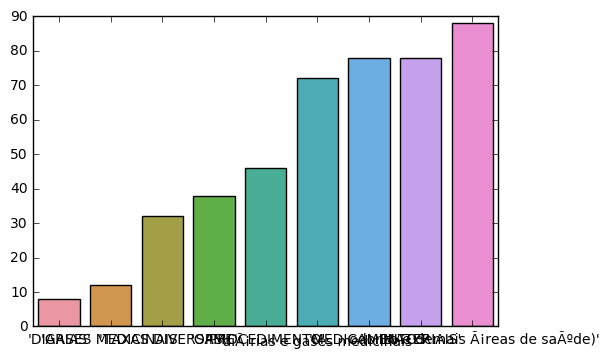

In [286]:
%matplotlib inline 
tup_list = [(key, item_type_dict[key]) for key in item_type_dict.keys()]
sorted_list = sorted(tup_list, key=lambda tup: tup[1])
sb.barplot(x=[tup[0] for tup in sorted_list], y=[tup[1] for tup in sorted_list])

In [228]:
len(service_df["id_conta"].unique())

1

In [86]:
cd ..

/home/raven/cetax/orizon
